In [20]:
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv("youtube_influencers_data_cleaned.csv")
df.head()

,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,...,Log No of Videos the Channel,Log No of Playlist,Log Community Engagement (Posts per week),Log Video Views Bucket,Like Score,Comment Score,Mean Log Views Until Then,Loyalty Score,Atractness Score,Efficiency Score
0,246636162,Me at the zoo,https://www.youtube.com/c/jawed,Jawed,Male,3110000.0,2.448498e+08,00:00:19,19.0,2005-04-24,...,0.000000,NaN,NaN,Bucket 5,0.843557,0.840194,19.323425,1.292525,1.292039,inf
1,4308230,A Message From Chad and Steve,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2006-10-10,...,6.300786,NaN,2.890372,Bucket 3,0.667948,0.574252,15.276038,0.881478,1.387510,3.816287
2,19897294,Drug problems,https://www.youtube.com/user/JAM05028,Jam05028,Male,211000.0,3.369131e+07,00:05:07,307.0,2007-10-28,...,4.382027,1.94591,NaN,Bucket 4,0.734605,0.510740,16.806094,1.370850,1.413809,3.955419
3,1751708,YouTube Captions and Subtitles,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2008-09-22,...,6.300786,NaN,2.890372,Bucket 3,0.573365,NaN,14.826070,0.855513,1.387510,3.816287
4,151671688,Seaworld SHAMU Killer Whale Show,https://www.youtube.com/c/videotragic,Videotragic,NaN,405000.0,1.515964e+08,00:09:53,593.0,2009-07-18,...,2.708050,NaN,NaN,Bucket 5,0.728467,0.551478,18.837229,1.458934,1.458895,6.955828


In [22]:
df.columns

Index(['Video Views', 'Video Title', 'Channel URL', 'Creator Name',
       'Creator Gender', 'Total Channel Subcribers', 'Total Chanel Views',
       'Duration of Video', 'Duration in Seconds', 'Date of Video Upload',
       'No of Likes', 'Language of the Video', 'Subtitle', 'Video Description',
       'Hashtags', 'No of Comments', 'Date of the Last Comment',
       'Maximum Quality of the Video', 'No of Videos the Channel',
       'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)', 'Log Video Views',
       'Log Total Channel Subcribers', 'Log Total Chanel Views',
       'Log Duration in Seconds', 'Log No of Likes', 'Log Hashtags',
       'Log No of Comments', 'Log Maximum Quality of the Video',
       'Log No of Videos the Channel', 'Log No of Playlist',
       'Log Community Engagement (Posts per week)', 'Log Video Views Bucket',
       'Like Score', 'Comment Score', 'Mean Log Views Until Then',
       'Loyalty Score', 'Atractness Score', 'Efficien

In [23]:
numeric_log_columns = ['Log Video Views',
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log No of Likes',
 'Log Hashtags',
 'Log No of Comments',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Log Community Engagement (Posts per week)',
 'Like Score',
 'Comment Score',
 'Mean Log Views Until Then',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']

In [24]:
#sns.pairplot(df[columns], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

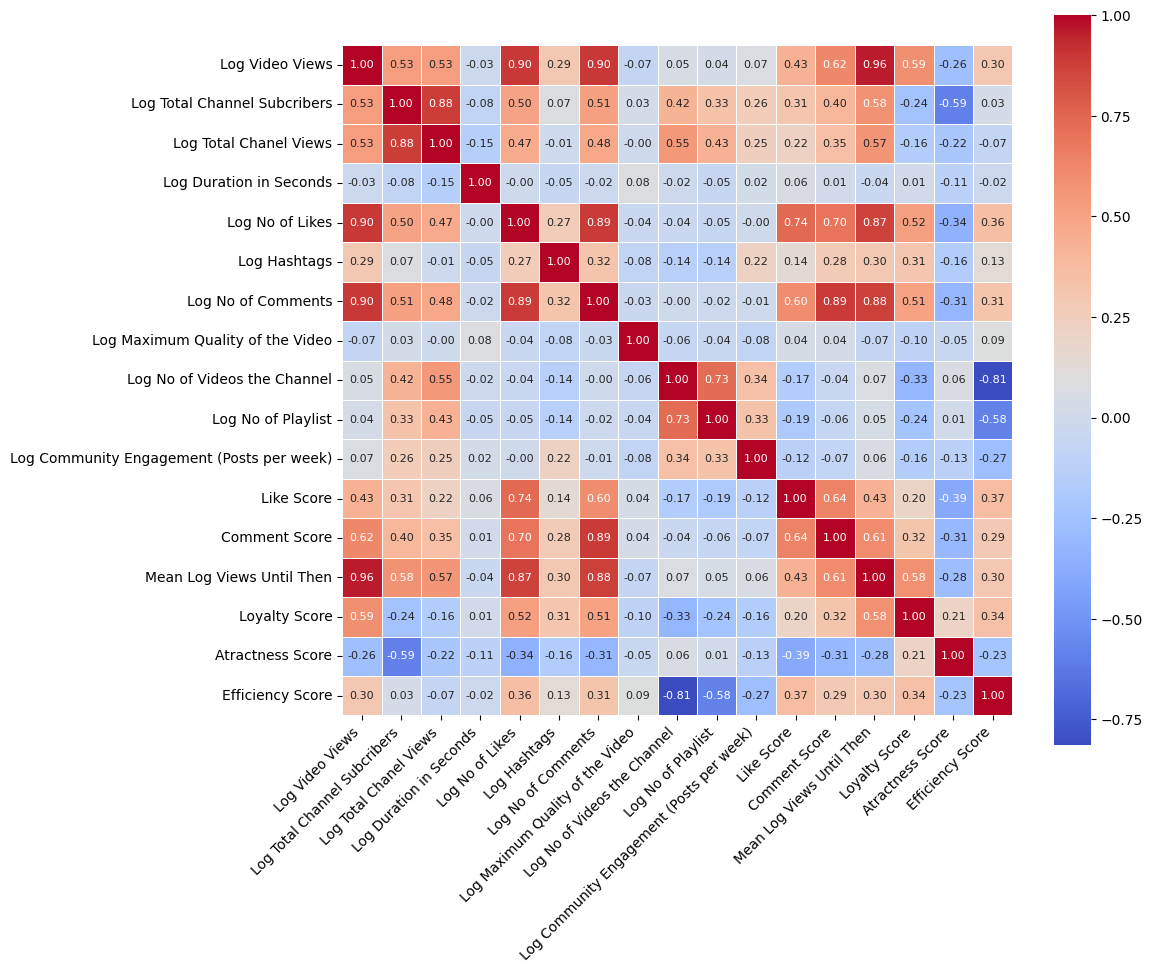

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Increase figure size for better fit

corr_matrix = df[numeric_log_columns].corr(method='spearman')

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": 1},
    linewidths=0.5,  # optional, to separate cells clearly
    annot_kws={"size": 8}  # reduce annotation font size if crowded
)

plt.xticks(rotation=45, ha='right')  # rotate x labels to avoid overlap
plt.yticks(rotation=0)  # keep y labels horizontal
plt.tight_layout()  # adjust layout so labels fit

plt.show()


In [26]:
log_reg_columns = ["Log Video Views Bucket",
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']

In [51]:
df['Log Video Views Bucket 5'] = df['Log Video Views Bucket'].apply(lambda x: 1 if x == 'Bucket 3' else 0)
df.head()   

,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,...,Log No of Playlist,Log Community Engagement (Posts per week),Log Video Views Bucket,Like Score,Comment Score,Mean Log Views Until Then,Loyalty Score,Atractness Score,Efficiency Score,Log Video Views Bucket 5
0,246636162,Me at the zoo,https://www.youtube.com/c/jawed,Jawed,Male,3110000.0,2.448498e+08,00:00:19,19.0,2005-04-24,...,NaN,NaN,Bucket 5,0.843557,0.840194,19.323425,1.292525,1.292039,inf,0
1,4308230,A Message From Chad and Steve,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2006-10-10,...,NaN,2.890372,Bucket 3,0.667948,0.574252,15.276038,0.881478,1.387510,3.816287,1
2,19897294,Drug problems,https://www.youtube.com/user/JAM05028,Jam05028,Male,211000.0,3.369131e+07,00:05:07,307.0,2007-10-28,...,1.94591,NaN,Bucket 4,0.734605,0.510740,16.806094,1.370850,1.413809,3.955419,0
3,1751708,YouTube Captions and Subtitles,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2008-09-22,...,NaN,2.890372,Bucket 3,0.573365,NaN,14.826070,0.855513,1.387510,3.816287,1
4,151671688,Seaworld SHAMU Killer Whale Show,https://www.youtube.com/c/videotragic,Videotragic,NaN,405000.0,1.515964e+08,00:09:53,593.0,2009-07-18,...,NaN,NaN,Bucket 5,0.728467,0.551478,18.837229,1.458934,1.458895,6.955828,0


In [52]:
df[log_reg_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log Video Views Bucket            891 non-null    object 
 1   Log Total Channel Subcribers      903 non-null    float64
 2   Log Total Chanel Views            896 non-null    float64
 3   Log Duration in Seconds           904 non-null    float64
 4   Log Maximum Quality of the Video  905 non-null    float64
 5   Log No of Videos the Channel      905 non-null    float64
 6   Log No of Playlist                851 non-null    float64
 7   Loyalty Score                     903 non-null    float64
 8   Atractness Score                  894 non-null    float64
 9   Efficiency Score                  896 non-null    float64
dtypes: float64(9), object(1)
memory usage: 70.8+ KB


In [53]:
reg_data = df[["Log Video Views Bucket 5",
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']].copy()

In [54]:
reg_data.dropna(inplace=True)
reg_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 2 to 904
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log Video Views Bucket 5          839 non-null    int64  
 1   Log Total Channel Subcribers      839 non-null    float64
 2   Log Total Chanel Views            839 non-null    float64
 3   Log Duration in Seconds           839 non-null    float64
 4   Log Maximum Quality of the Video  839 non-null    float64
 5   Log No of Videos the Channel      839 non-null    float64
 6   Log No of Playlist                839 non-null    float64
 7   Loyalty Score                     839 non-null    float64
 8   Atractness Score                  839 non-null    float64
 9   Efficiency Score                  839 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 72.1 KB


In [55]:
y = reg_data["Log Video Views Bucket 5"]
X = reg_data[[
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']]

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# X: özellik matrisi, y: hedef değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
y_train.value_counts()


Log Video Views Bucket 5
0    382
1    289
Name: count, dtype: int64

In [64]:
y_test.value_counts()


Log Video Views Bucket 5
0    99
1    69
Name: count, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Skorlar
print("Accuracy       :", accuracy_score(y_test, y_pred))
print("Precision      :", precision_score(y_test, y_pred))
print("Recall         :", recall_score(y_test, y_pred))
print("F1 Score       :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy       : 0.5952380952380952
Precision      : 0.5116279069767442
Recall         : 0.3188405797101449
F1 Score       : 0.39285714285714285

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70        99
           1       0.51      0.32      0.39        69

    accuracy                           0.60       168
   macro avg       0.57      0.55      0.54       168
weighted avg       0.58      0.60      0.57       168



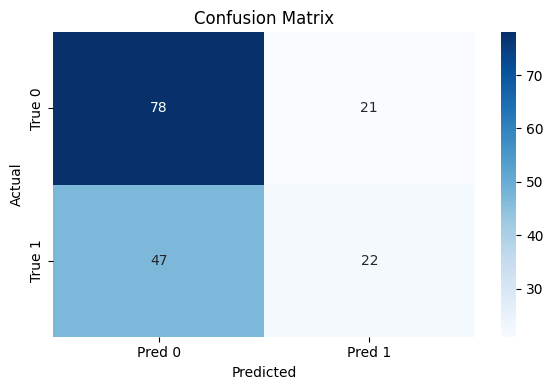

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


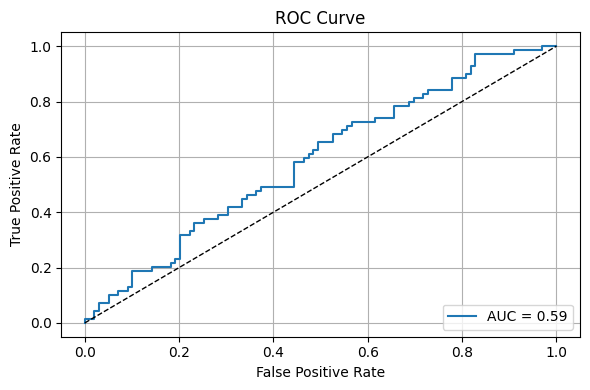

In [60]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # 1 sınıfı olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


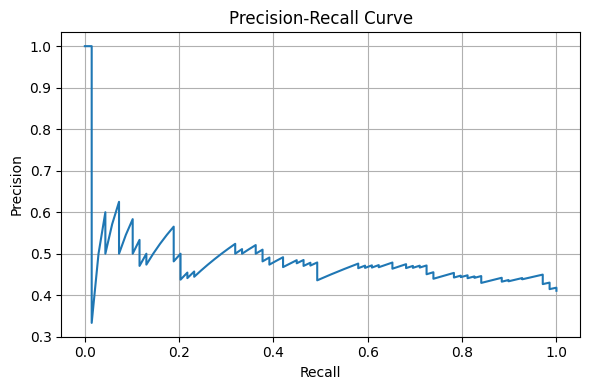

In [61]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


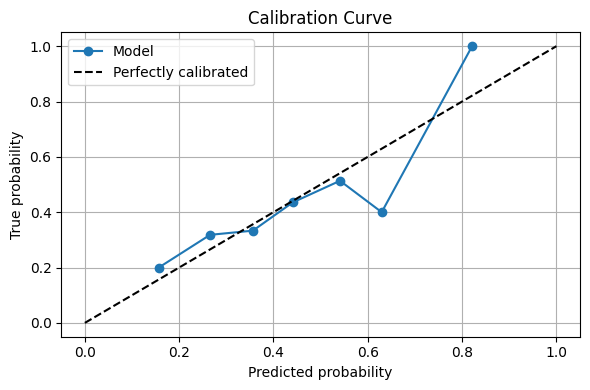

In [62]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
